# Dengue Outbreak Analysis Notebook

In [ ]:
import sys
sys.path.append('/home/user/arbovirus_outbreak_forecasting/')
print(sys.path)

### Import the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from config import PROJECT_ROOT
from src.utils.data_loader import get_surveillance_data

import os, sys


In [3]:
start_date = '2019-01-01'
end_date = '2024-04-02'

data = get_surveillance_data(start_date,
                         end_date)

## Feature engineering


In [ ]:
from src.data_processing.feature_engineering import FeatureEngineer

fe = FeatureEngineer(data)
fe.transform()

In [5]:
sys.path.append(PROJECT_ROOT)
file_path = os.path.join(PROJECT_ROOT, 'data/featured_data.csv')
fe.df.to_csv(file_path, index=False)

In [8]:
fe.df.head()

,city,date,temperature_2m_max,temperature_2m_min,precipitation_sum,wind_speed_10m_max,arbovirus_bool,occurrence_id,vector,source_type,...,wind_speed_10m_max_3d_std,wind_speed_10m_max_7d_mean,wind_speed_10m_max_7d_std,wind_speed_10m_max_14d_mean,wind_speed_10m_max_14d_std,optimal_mosquito_temp,breeding_conditions,breeding_conditions_lag_3,breeding_conditions_lag_7,breeding_conditions_lag_14
0,Beyla,2019-01-01,30.819795,17.909107,4.425247,6.130177,0.0,832.0,Aedes luteocephalus,survey,...,0.000000,6.130177,0.000000,6.130177,0.000000,1,0,0.0,0.0,0.0
1,Beyla,2019-01-01,30.819795,17.909107,4.425247,6.130177,0.0,1512.0,Aedes aegypti,survey,...,0.000000,6.130177,0.000000,6.130177,0.000000,1,0,0.0,0.0,0.0
2,Beyla,2019-01-02,30.605380,22.939502,2.951032,7.325553,0.0,832.0,Aedes luteocephalus,survey,...,0.690150,6.528636,0.690150,6.528636,0.690150,1,1,0.0,0.0,0.0
3,Beyla,2019-01-02,30.605380,22.939502,2.951032,7.325553,0.0,1512.0,Aedes aegypti,survey,...,0.690150,6.727865,0.690150,6.727865,0.690150,1,1,0.0,0.0,0.0
4,Beyla,2019-01-03,30.319125,22.745938,6.499598,8.679164,0.0,832.0,Aedes luteocephalus,survey,...,0.781508,7.118125,1.057707,7.118125,1.057707,1,1,0.0,0.0,0.0


## Forecasting

In [6]:
from src.models.forecaster import DiseaseForecaster

# Initialize forecaster
forecaster = DiseaseForecaster(fe.df)

## Evaluation

In [7]:
from src.models.evaluate_forecast import DiseaseForecastEvaluator

evaluator = DiseaseForecastEvaluator(fe.df)

In [12]:
prophet_data = forecaster.prepare_data()
results = evaluator.cross_validation(prophet_data)

In [11]:
results

{'Beyla': {'mse': 6.336535160152842e-07,
  'mae': 0.0006465426190236258,
  'rmse': 0.0007773561639897161,
  'r2': 0.0,
  'mape': inf},
 'Boffa': {'mse': 2.000394403161433,
  'mae': 1.139528447775211,
  'rmse': 1.3400933175505871,
  'r2': 0.0,
  'mape': inf},
 'Boké': {'mse': 5.887586611252068,
  'mae': 2.0356212142022034,
  'rmse': 2.4139774609503513,
  'r2': 0.0,
  'mape': inf},
 'Conakry': {'mse': 3.706699803080025e-06,
  'mae': 0.0015031820858961997,
  'rmse': 0.0016955647641164536,
  'r2': 0.0,
  'mape': inf},
 'Coyah': {'mse': 6.519641296958226e-06,
  'mae': 0.0019030529841639425,
  'rmse': 0.002282604546829089,
  'r2': 0.0,
  'mape': inf},
 'Dabola': {'mse': 0.0, 'mae': 0.0, 'rmse': 0.0, 'r2': 1.0, 'mape': nan},
 'Dalaba': {'mse': 5.764993452664228e-07,
  'mae': 0.0005024713372020301,
  'rmse': 0.000629625706690432,
  'r2': 0.0,
  'mape': inf},
 'Dinguiraye': {'mse': 5.048748072640282e-05,
  'mae': 0.005651144305761642,
  'rmse': 0.006824762381857716,
  'r2': 0.0,
  'mape': inf},

### Disease Forecast Plots

01:56:12 - cmdstanpy - INFO - Chain [1] start processing
01:56:13 - cmdstanpy - INFO - Chain [1] done processing


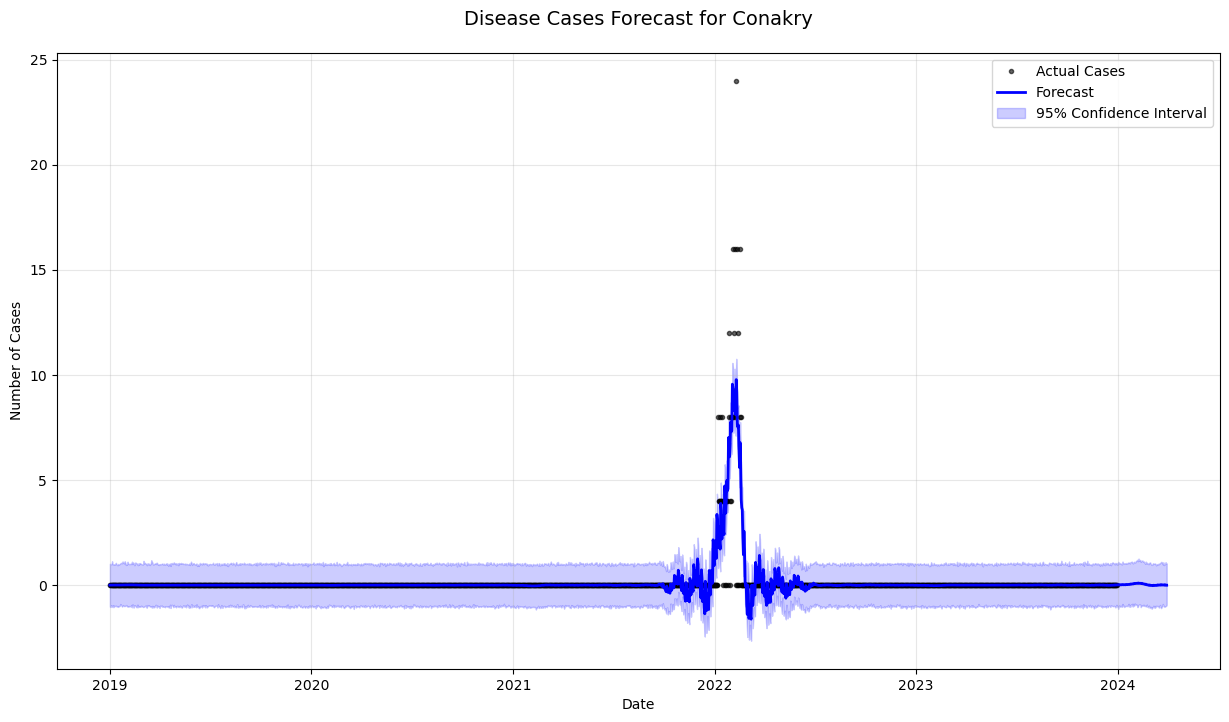

In [14]:
city = 'Conakry'
city_plot = forecaster.plot_forecast(city=city)

01:56:22 - cmdstanpy - INFO - Chain [1] start processing
01:56:23 - cmdstanpy - INFO - Chain [1] done processing


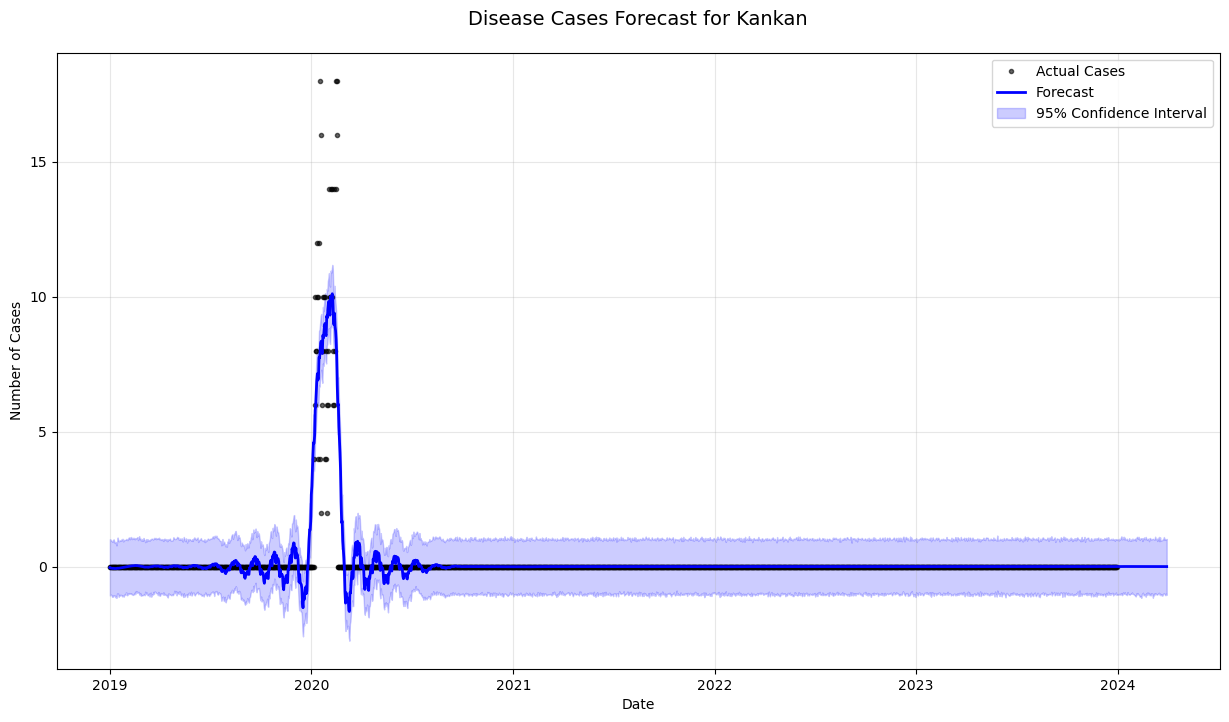

In [15]:
city = 'Kankan'
city_plot = forecaster.plot_forecast(city=city)

In [17]:
plt.close()